In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('model.csv')

In [3]:
df.head()

,Unnamed: 0,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,is_mail,comment_duplication,classifier_val
0,0,0.372249,0.280355,3.057751,0.083333,3,6.612096,4.0,0,0.000000,8.750086,1.0,1,0,0,0,0.000000,1
1,1,0.354255,0.341604,2.410947,0.000000,1,4.897796,1.0,0,0.000000,15.380144,2.0,0,0,0,0,0.715092,0
2,2,0.487752,0.314966,1.578192,0.000000,1,3.791178,0.0,0,0.000000,14.181022,0.0,0,0,0,0,0.000000,0
3,3,0.468095,0.368193,2.328976,0.000000,1,5.041488,0.0,0,0.090909,13.636652,2.0,0,0,0,0,0.000000,0
4,4,0.366191,0.258061,2.238987,0.000000,1,5.174158,4.0,0,0.000000,13.529500,0.0,1,1,0,0,0.000000,0


In [4]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'is_mail', 'comment_duplication', 'classifier_val'],
      dtype='object')

### Standardization

In [5]:
dfc = df.copy()

In [6]:
y = dfc['classifier_val']
X = dfc.drop(['classifier_val','id'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

### Handle imbalance dataset

In [9]:
dfc['classifier_val'].value_counts()

0    2540
1     585
Name: classifier_val, dtype: int64

In [10]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

X_train = X_train_os
y_train = y_train_os

C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 1778, 1: 409})
The number of classes after fit Counter({1: 1756, 0: 1756})


### Hyperparameter Tuninng

In [11]:
from sklearn.ensemble import RandomForestClassifier 

In [12]:
rf = RandomForestClassifier()

In [13]:
rf.get_params() # hyperParameter list

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# RandomizedSearchCV for find the most suited model

In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(100,2000,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [17]:
random_grid

{'n_estimators': [100,
  119,
  138,
  157,
  176,
  195,
  215,
  234,
  253,
  272,
  291,
  311,
  330,
  349,
  368,
  387,
  407,
  426,
  445,
  464,
  483,
  503,
  522,
  541,
  560,
  579,
  598,
  618,
  637,
  656,
  675,
  694,
  714,
  733,
  752,
  771,
  790,
  810,
  829,
  848,
  867,
  886,
  906,
  925,
  944,
  963,
  982,
  1002,
  1021,
  1040,
  1059,
  1078,
  1097,
  1117,
  1136,
  1155,
  1174,
  1193,
  1213,
  1232,
  1251,
  1270,
  1289,
  1309,
  1328,
  1347,
  1366,
  1385,
  1405,
  1424,
  1443,
  1462,
  1481,
  1501,
  1520,
  1539,
  1558,
  1577,
  1596,
  1616,
  1635,
  1654,
  1673,
  1692,
  1712,
  1731,
  1750,
  1769,
  1788,
  1808,
  1827,
  1846,
  1865,
  1884,
  1904,
  1923,
  1942,
  1961,
  1980,
  2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [100,
  102,
  104,
  106,
  108,
  110,
  112,
  114,
  116,
  118,
  120,
  122,
  124,
  126,
  128,
  130,
  132,
  134,
  136,
  138,
  140,
  142,
  144,
  146,
  148,
  150,


In [18]:
# rf is the base model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [19]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 39.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, 102, 104, 106, 108,
                                                      110, 112, 114, 116, 118,
                                                      120, 122, 124, 126, 128,
                                                      130, 132, 134, 136, 138,
                                                      140, 142, 144, 146, 148,
                                                      150, 152, 154, 156, 158, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 119, 138, 157,
                                                      

### Evaluate

In [36]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=1522, n_estimators=1059)

In [37]:
# get the best model in to instance (for save in disk)
best_model = rf_random.best_estimator_ 

In [38]:
rf_random.best_score_

0.9538870854660327

In [39]:
rf_random.best_params_

{'n_estimators': 1059,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1522,
 'bootstrap': False}

In [40]:
y_pred=rf_random.best_estimator_.predict(X_test)

In [41]:
err = (y_test - y_pred)

In [42]:
err.value_counts()

 0    832
 1     79
-1     27
Name: classifier_val, dtype: int64

<AxesSubplot:>

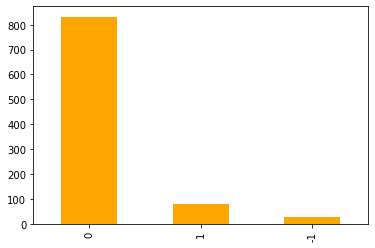

In [43]:
err.value_counts().plot(kind='bar',color='orange')

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11300639658848614
MSE: 0.11300639658848614
RMSE: 0.33616424049634747


Text(0, 0.5, 'Feature Importance Score')

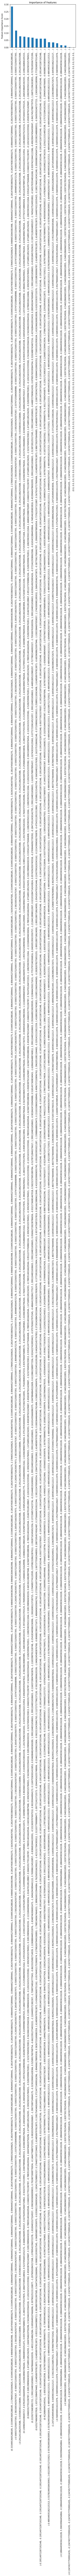

In [51]:
indices=list(X_train)
feat_imp = pd.Series(best_model.feature_importances_, indices).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[735  27]
 [ 79  97]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       762
           1       0.78      0.55      0.65       176

    accuracy                           0.89       938
   macro avg       0.84      0.76      0.79       938
weighted avg       0.88      0.89      0.88       938



In [29]:
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

In [30]:
# best score is  0.9536568117160222

### EXtra Works (just for check some doubts )

In [31]:
# again train and test by using best model we got (this is for just see the result)

In [32]:
#model = RandomForestClassifier(n_estimators= 215,bootstrap = False,max_depth=1054,max_features='auto',min_samples_leaf= 1,min_samples_split= 2)

In [33]:
best_model

RandomForestClassifier(bootstrap=False, max_depth=1522, n_estimators=1059)

In [34]:
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=1522, n_estimators=1059)

In [48]:
y_pr = best_model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pr))
print(classification_report(y_test, y_pr))

[[735  27]
 [ 79  97]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       762
           1       0.78      0.55      0.65       176

    accuracy                           0.89       938
   macro avg       0.84      0.76      0.79       938
weighted avg       0.88      0.89      0.88       938



In [ ]:
# base model without hyperparameter tuning

In [ ]:
model_base.fit(X_train,y_train)

In [ ]:
y_pr = model_base.predict(X_test)

In [ ]:
err = (y_pr - y_test)

In [ ]:
err.value_counts().plot(kind='bar',color='blue')

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pr))
print(classification_report(y_test, y_pr))

[[735  27]
 [ 79  97]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       762
           1       0.78      0.55      0.65       176

    accuracy                           0.89       938
   macro avg       0.84      0.76      0.79       938
weighted avg       0.88      0.89      0.88       938

